# Titanic: Machine Learning from Disaster

Prevendo os sobreviventes do Titanic com a utilização de Regressão Logística


## Definição do problema

O naufrágio do Titanic foi um dos maiores desastres na história. Ocorrido em 15 de abril de 1912, após uma colisão com um iceberg, o navio afundou. O saldo final da tragédia foi um total de 1502 mortos de um total de 2224 pessoas (incluindo passageiros e tripulação). Um dos motivos para o grande número de vítimas (cerca de 68%) diz respeito à quantidade de botes bem inferior ao mínimo que seria necessário.

Nessa situação, apesar do fator "sorte" ter feito parte na sobrevivência dos passageiros do Titanic, existiram grupos de pessoas que tinham uma maior probabilidade de escaparem da morte (como por exemplo mulheres, crianças e passageiros viajando na primeira-classe), como informa a descrição do próprio desafio.

Dentro desse contexto, o site Kaggle fornece então um conjunto de dados aos competidores do desafio, contendo algumas informações (nome, idade, sexo, sobreviveu(sim/não), etc.) sobre 891 passageiros. É esperado que o competidor conduza uma análise e crie um modelo capaz de prever, com a maior acurácia possível, a condição de sobrevivência para os passageiros restantes (dataset de teste).

## Dados

Disponíveis no https://www.kaggle.com/competitions/titanic em formato '.csv'.
São divididos em:
* Conjunto de treinamento (train.csv): para ser utilizado para construir os modelos de machine learning. Neste arquivo, possui a informação se cada passageiro sobreviveu ou não. 

* Conjunto de teste (test.csv): para verificar o quão bom o modelo construido é com dados não observados até então. Neste aqruivo, não é fornecida a condição de sobrevivência para cada passageiro. O modelo construído é que deve fazer essa previsão.

In [1]:
# Importação de bibliotecas para trabalhar com os dados do Titanic.

# Análise de dados 
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 

# Desabilitar alertas do notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando arquivos de treinamento e teste diretamente do Kaggle no Add Data: titanic
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
# Aquisição dos conjuntos de dados
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

## Análise Exploratória

Inicialmente gerar as entradas e saídas do dataframe para ter conhecimento sobre como os dados estão estruturados.

In [4]:
# Retorna os dados do dataframe
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Significado das variáveis

Cada coluna contém uma diferente variável importante para interpretação do problema e entendimento dos dados, sendo o significado:

* *PassengerId*: ID do passageiro (de 0 a 890)
* *Survived*: Sobreviveu (== 0) ou Não sobreviveu (== 1)
* *Pclass*: Classe do passageiro (1st, 2nd, 3rd) - primeira, segunda e terceira classe
    - Uma representação para o status socioeconômico (SES):
            - 1st = Superior 
            - 2nd = Médio 
            - 3rd = Inferior
* *Name*: Nome do passageiro
* *Sex*: Sexo do passageiro (male == homem) ou (female == mulher)
* *Age*: Idade
    - Idade é fracionária se for menor que 1
    - Se a idade for estimada ela está em forma de xx.5
* *SibSp*: Número de irmãos (irmão/irmã e meio-irmão/meia-irmã) e cônjuges (marido e esposa, amantes e noivos foram ignorados) a bordo
* *Parch*: Número de pais (mãe e pai) e crianças (filha/filho e enteada/enteado) a bordo 
    - Crianças viajando apenas com babá recebem Parch = 0
* *Ticket*: Número do ticket de embarque
* *Fare*: Tarifa paga pelo passageiro
* *Cabin*: Número da cabine
* *Embarked*: Porto de embarque (C == Cherbourg), (S == Southampton) e (Q == Queenstown)

Podemos agora ver outras **informações sobre as variáveis** a fim de identificar o tipo de variável, a contagem do número de entradas para cada uma (tendo uma noção dos missing values ou dados fragmentados), valor mínimos/máximos, médias etc.

In [5]:
# Informações sobre as variáveis 
df_train.info()
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


O método **.info()** retorna um resumo conciso do dataframe, permitindo identificar o tipo da variável em cada coluna. Já o método **.describe()** retorna diferentes características das colunas numéricas do dataframe (distribuições estatísticas).

#### Missing Values

Com isso, é possível identificar que as colunas que possuem missing values (ou seja, seus dados precisam ser corrigidos) são:

* 'Cabin'
* 'Age'
* 'Embarked'

Dentre essas variáveis, a que pode apresentar maiores problemas ao implementarmos um modelo de machine learning é a Age, uma vez que corresponde a catacterísticas diretas dos passageiros, sendo um dado fundamental durante a análise exploratória.

Contudo, podemos tratar esses valores ausentes mais adiante, usando algumas alternativas para remover ou substituir esses dados faltantes.

#### Outliers
Podemos também perceber que existem outliers presentes no conjunto de dados, mais especificamente nas variáveis Age e Fare. É provável que existam valores discrepantes presentes em outras variáveis também.

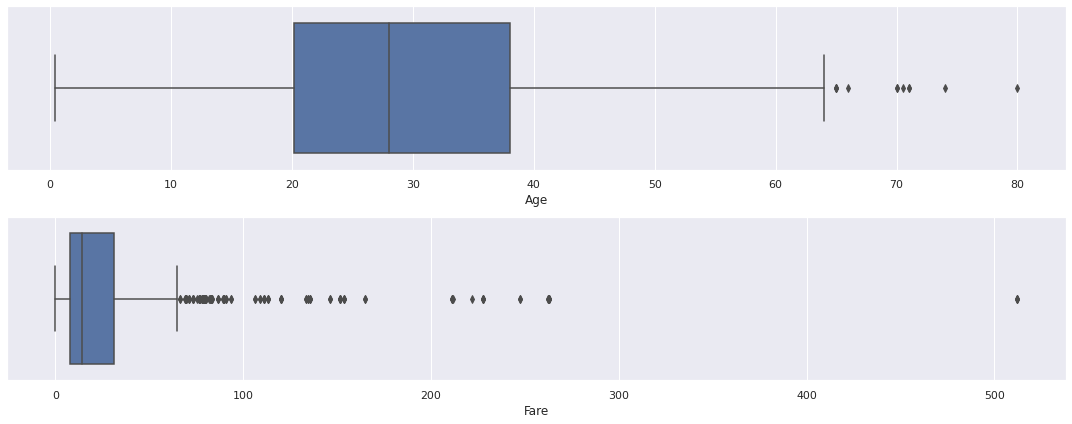

In [6]:
# Boxplot das variáveis Age e Fare
fig, (axis1, axis2) = plt.subplots(2,1, figsize = (15,6))
sns.boxplot(data = df_train, x = 'Age', ax = axis1)
sns.boxplot(data = df_train, x = 'Fare', ax = axis2)

plt.tight_layout()

## Análise mais específica e detecção de padrões

Após extrairmos algumas informações iniciais do conjunto de dados, podemos partir para questionamentos mais específicos, relacionados diretamente à chance de sobrevivência de um determinado grupo de passageiros, considerando classe de embarque, sexo, idade, etc.

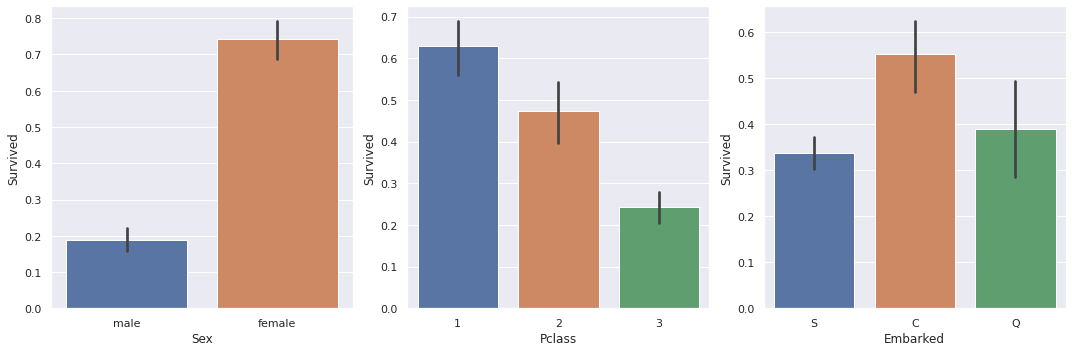

In [7]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize = (15,5))

sns.barplot(data = df_train, x = 'Sex', y = 'Survived', ax = axis1)
sns.barplot(data = df_train, x = 'Pclass', y = 'Survived', ax = axis2)
sns.barplot(data = df_train, x = 'Embarked', y = 'Survived', ax = axis3)

plt.tight_layout()

A partir da análise dos três gráficos acima, podemos extrair duas informações importantes:

* As mulheres têm muito mais chances de sobreviverem do que os homens, enquanto elas possuem cerca de 75% de chances, os homens apresentam cerca de 18%.

* Os passageiros que viajaram na 1ª Classe possuem mais que o dobro de chances de sobreviverem em relação aos que compraram a 3ª Classe.

* Os passageiros que embarcaram a partir da cidade de Cherbourg são os que mais têm chances de sobreviverem, enquanto os que embarcaram em Southampton, possuem as menores chances.

As probabilidades de sobrevivência das mulheres no desastre do Titanic se estesdem para todos os casos individuais, para todas as classes de viagem e cidades de embarque, como podemos observar nos gráficos abaixo.

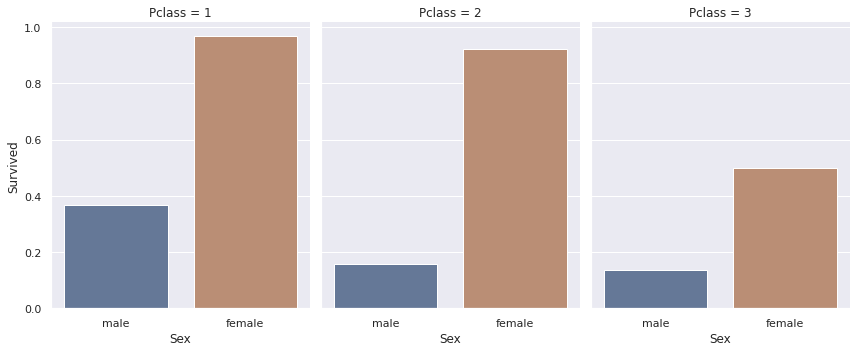

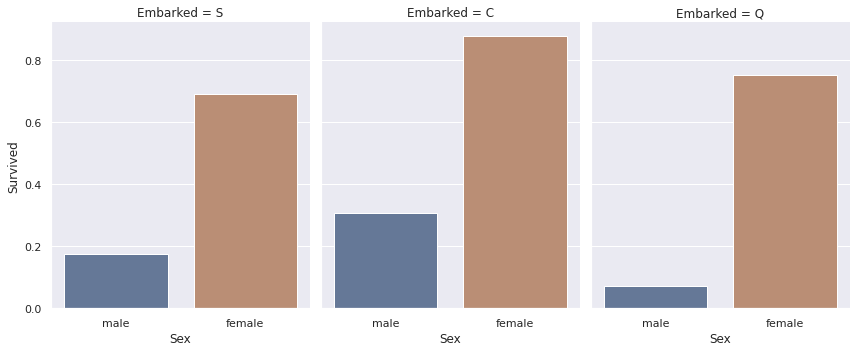

In [8]:
sns.catplot(x = "Sex", y = "Survived", col = "Pclass", data = df_train, 
            saturation = .5, kind = "bar", ci = None, aspect = 0.8)
sns.catplot(x = "Sex", y = "Survived", col = "Embarked", data = df_train, 
            saturation = .5, kind = "bar", ci = None, aspect = 0.8)

plt.tight_layout()
     

Também podemos realizar a análise em relação às idades dos passageiros e saber quais tiveram mais chances de sobreviver.

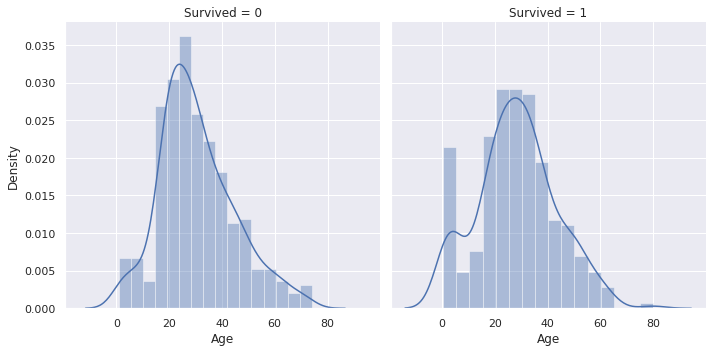

In [9]:
sns.FacetGrid(df_train, col = 'Survived', height = 5).map(sns.distplot, 'Age')

plt.tight_layout()

In [10]:
print(df_train['Age'].quantile([.1, .25, .5, .75, .99]))

0.10    14.000
0.25    20.125
0.50    28.000
0.75    38.000
0.99    65.870
Name: Age, dtype: float64


Os gráficos acima mostram a distribuição de idades para os sobreviventes e mortes no naufrágio, podemos perceber que a maior parte dos passageiros, nas duas situações, possuem idades entre 20 e 30 anos.

Sendo que 75% dos passageiros têm até 38 anos e menos de 1% têm mais de 65 anos.

No gráfico da direita (sobreviventes), podemos perceber que há um pico nos passageiros que possuem idade de até 5 anos, mostrando que crianças um pouco menores têm mais chances de sobreviver.

### Correlações entre features e o target

Através do heatmap, podemos entender a correlação entre as variáveis explicativas e o target ('Survived'), sendo elas positivas ou negativas.

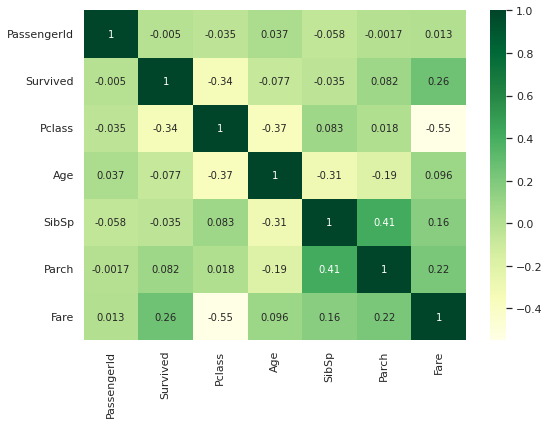

In [11]:
fig, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(df_train.corr(), fmt = '.2g', cmap = 'YlGn', annot= True)
plt.tight_layout()

As maiores correlações apresentadas foram entre as variáveis Parch e SibSp, cujo valor é de 0,41.

Ao final dessa análise exploratória, foi possível entender melhor os dados e como eles se comportam, extraindo informações que serão importantes ao implementar o modelo de machine learning, pois será mais fácil escolher as melhores variáveis para melhorar o desempenho do modelo.

## Modelo de Machine Learning 

A **Regressão Logística** é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável dependente *Y*, frequentemente binária ou dicotômica (0 ou 1), em função de uma ou mais variáveis independentes contínuas e/ou binárias.

Então, a partir desse modelo gerado é possível calcular ou prever a probabilidade de um evento ocorrer, dado uma observação aleatória.

#### Preparação dos Dados

Nesta etapa, devemos nos preocupar em fazer os ajustes finais dos dados e tratá-los para alimentar o modelo. Esses ajustes envolver a seleção das features, criação de novas variáveis, limpeza dos dados, separação do dataset, etc.

#### Organização dos Conjuntos de Dados

Apesar de os datasets de treino e testes estarem inicialmente separados, uma boa prática é juntá-los em um único dataset para poder aplicar as devidas alterações e depois separá-los novamente. Isso, além de importante, oferece praticidade, pois as mudanças precisam ser as mesmas para os dois conjuntos de dados.

In [12]:
# Salvando os índeces para recuperação dos conjuntos de dados
train_ID = df_train.shape[0]
test_ID = df_test.shape[0]

In [13]:
# Salvando a variável 'PassengerId' para submissão 
Passenger_ID = df_test.PassengerId

In [14]:
# Salvando o target e separando do dataset de treino
target = df_train['Survived'].copy()
df_train.drop(['Survived'], axis = 1, inplace = True)

In [15]:
# Unindo os conjuntos de dados
df_total = pd.concat(objs = [df_train, df_test], axis = 0).reset_index(drop = True)

In [16]:
# Visualizar quantidade de dados total no conjunto 
df_total.shape

(1309, 11)

#### Selecionando as Principais Variáveis

Nesta etapa, é fundamental selecionarmos as variáveis que realmente são relevantes para a construção do modelo. Sendo neste ca serem consideradas apenas as variáveis Pclass, Sex, Age, SibSp, Parch, Fare, Embarked.

In [17]:
# Removendo as variáveis que não serão utilizadas 
df_total.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [18]:
# Visualizar a base de dados atual
df_total.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


#### Tratando os missing values

Como comentado anteriormente, a presença de valores faltantes no conjunto de dados influencia diretamente as análises exploratória e o aprendizado dos modelos. Desta forma, precisamos tratar esses dados adotando alguns métodos, por exemplo, excluindo esses valores ou substituindo-os por outros que possivelmente representem bem esses dados.

In [19]:
# Quantidade de missing values 
df_total.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

Podemos perceber que a maior quantidade de dados faltantes está presente na variável **Age** e, como visto anteriormente, essa coluna também possui outliers. As colunas **Fare** e **Embarked** também apresentam valores faltantes, mas insignificantes, em quantidade, quando comparados à variável Age.

Iremos utilizar os valores das medianas para substituir os dados ausentes das variáveis Age e Fare, enquanto para Embarked será usado o valor de maior frequência.

In [20]:
# Substituindo os missing values de 'Age' pela mediana da coluna
df_total.loc[df_total['Age'].isnull(), 'Age'] = df_total['Age'].median()

# Substituindo os missing values de 'Fare' pela mediana da coluna
df_total.loc[df_total['Fare'].isnull(), 'Fare'] = df_total['Fare'].median()

In [21]:
# Verificando a frequência dos valores de 'Embarked'
print(df_total['Embarked'].unique())
print(df_total['Embarked'].value_counts())

# Substituindo os valores nulos de 'Embarked' por 'S'
df_total.loc[df_total['Embarked'].isnull(), 'Embarked'] = 'S'

['S' 'C' 'Q' nan]
S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [22]:
# Verificando se todas as substituições deram certo 
df_total.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Ajustando variáveis 

Devemos converter as variáveis qualitativas 'Sex' e 'Embarked'em variáveis quantitativas (variáveis dummies)

As variáveis 'Sex' e 'Embarked' contém informações textuais (qualitativas), porém para o algoritmo de previsão de machine learning, a variável númerica (quantitativa) acaba sendo melhor.

In [23]:
# Importação de LabelEncoder para transformação das variáveis 
from sklearn.preprocessing import LabelEncoder

In [24]:
# Trasnformação das variáeis Sex e Embarked de categóricas para numéricas 
df_total['Sex'] = df_total[['Sex']].apply(LabelEncoder().fit_transform)
df_total['Embarked'] = df_total[['Embarked']].apply(LabelEncoder().fit_transform)

In [25]:
# Visualizar o resultado 
df_total

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
1304,3,1,28.0,0,0,8.0500,2
1305,1,0,39.0,0,0,108.9000,0
1306,3,1,38.5,0,0,7.2500,2
1307,3,1,28.0,0,0,8.0500,2


#### Dividindo novamente em conjuntos de Treino e Teste

Depois de aplicar as devidas alterações nos conjuntos de dados, podemos separá-los novamente e obter os dados de treino e teste a partir do índice que salvamos no início, treino_ID e teste_ID.

In [26]:
# Separando o df_total
train = df_total.iloc[:train_ID]
test = df_total.iloc[train_ID:]

In [27]:
# Confirmando o resultado 
display(train.head())
display(test.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,7.8292,1
892,3,0,47.0,1,0,7.0000,2
893,2,1,62.0,0,0,9.6875,1
894,3,1,27.0,0,0,8.6625,2
895,3,0,22.0,1,1,12.2875,2


#### Implementação do Modelo

Esta etapa costuma ser mais rápida de ser realizada, justamente porque a maior parte do tempo foi investido na análise exploratória e tratamento dos dados. Outro fator, é que a implementação dos modelos de machine learning são muito automatizados, sendo necessário apenas algumas linhas de código para treinar, testar e avaliar o modelo.

## Regressão Logística

In [28]:
# Importação do modelo
from sklearn.linear_model import LogisticRegression

# Instanciando o modelo 
lr_model = LogisticRegression(solver = 'liblinear')

# Treinando o modelo 
lr_model.fit(train, target)

LogisticRegression(solver='liblinear')

In [29]:
# Predição do modelo
y_pred_lr = lr_model.predict(test)

# Acurácia do modelo 
accuracy = lr_model.score(train, target)
print(f"Acurácia teste: {accuracy * 100:.2f}%")

Acurácia teste: 80.36%


### Submissão dos Resultados na Plataforma Kaggle

A última etapa do projeto é submeter a previsão do modelo no Kaggle e ver o desempenho.

Para isso, precisamos gerar o arquivo de submissão.

In [30]:
submission = pd.DataFrame({'PassengerID': Passenger_ID, 'Survived': y_pred_lr})

submission.to_csv('./submission_lr.csv', index = False)